In [2]:
path = r"C:\Users\Admin\Documents\Mirage-Omega1\ml_models\ete-synthesis\processed_audios\mirage_1.wav"

In [ ]:
import torchaudio as tad
import matplotlib.pyplot as plt

In [5]:
waveform, sample_rate = tad.load(path)

In [7]:
waveform, sample_rate

(tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0045, -0.0060, -0.0078]]), 16000)

Text(0.5, 1.0, 'waveform')

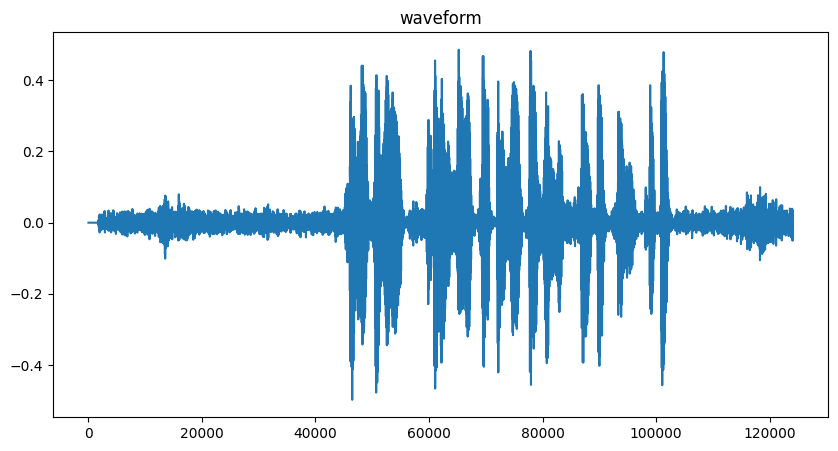

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(waveform.t().numpy())
plt.title("waveform")

In [16]:
waveform.shape

torch.Size([1, 124125])

In [ ]:
waveform.permute(1, 0)

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        ...,
        [-0.0045],
        [-0.0060],
        [-0.0078]])

In [ ]:
waveform.permute(0, 1)

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0045, -0.0060, -0.0078]])